# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

import itertools as it

import warnings
warnings.filterwarnings('ignore')


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Task 1

In [2]:
df_car = pd.read_csv("car_data.csv")

In [ ]:
df_car.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df_car['Trim'] .value_counts()

Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             20
Aero Sedan 4D           20
Linear Wagon 4D         14
SLE Sedan 4D            10
GT Coupe 2D             10
GTP Sedan 4D            10
AWD Sportwagon 4D       10
Linear Conv 2D          10
GT Sportwagon           10
Sportwagon 4D           10
SS Coupe 2D             10
Linear Sedan 4D         10
Aero Conv 2D            10
Arc Conv 2D             10
Arc Wagon 4D            10
Aero Wagon 4D           10
GXP Sedan 4D            10
LT MAXX Hback 4D        10
LT Coupe 2D             10
LS Hatchback 4D         10
CXL Sedan 4D            10
CXS Sedan 4D            10
Custom Sedan 4D         10
Limited Sedan 4D        10
Special Ed Ultra 4D     10
DHS Sedan 4D            10
DTS Sedan 4D            10
Hardtop Conv 2D         10
LT Hatchback 4D         10
M

In [ ]:
df_car.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df_car.drop(['Trim'],axis=1,inplace=True)

In [ ]:
df_car.head()

,Price,Mileage,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan,6,3.1,4,1,0,1


In [ ]:
model=linear_model.LinearRegression()
Mileage=df_car[['Mileage']]
Price=df_car['Price']
model.fit(Mileage,Price)

LinearRegression()

In [ ]:
print('Linear Regression equation : Y={:.4f} X + {:.4f} C'.format(model.coef_[0],model.intercept_))

Linear Regression equation : Y=-0.1725 X + 24764.5590 C


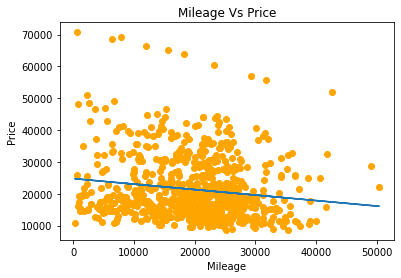

In [ ]:

plt.scatter(Mileage,Price,color='Orange')
plt.plot(Mileage,model.predict(Mileage))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage Vs Price')
plt.show()

In [ ]:
print('R^2 score for this equation: {:.4f}'
      .format(model.score(Mileage,Price)))

R^2 score for this equation: 0.0205


In [ ]:
df_car.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Type', 'Cylinder', 'Liter',
       'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

# **Tasks, Part 2**

In [ ]:
Car_Predict_columns=['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [ ]:
def linear_reg_eq_print(Car_Predict_columns,df_car,focus='Price'):
  model_2=linear_model.LinearRegression()
  input_columns=df_car[Car_Predict_columns]
  Price=df_car[focus]
  model_2.fit(input_columns,Price)
  print('The equation for columns {} with respect to Price:\n' '{} + {}'.format(Car_Predict_columns, model_2.coef_, model_2.intercept_))


In [ ]:
linear_reg_eq_print(Car_Predict_columns,df_car)

The equation for columns ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] with respect to Price:
[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] + 6758.755143598106


In [11]:
def linear_reg_ret_r_square(Car_Predict_columns,df_car,focus='Price'):
  model_2=linear_model.LinearRegression()
  input_columns=df_car[Car_Predict_columns]
  Price=df_car[focus]
  model_2.fit(input_columns,Price)
  return model_2.score(input_columns,Price)

In [ ]:
print('R Square value for the above equation is : {:.4f}'.format(linear_reg_ret_r_square(Car_Predict_columns,df_car)))

R Square value for the above equation is : 0.4463


In [ ]:
def get_combos(Cols):
  return [it.combinations(Cols,n+1) for n in range(len(Cols))]

In [ ]:
combos=get_combos(Car_Predict_columns)

In [ ]:
def all_combo_score(combos,df_car,focus='Price'):
  combo_score={}
  for i in range(len(list(combos))):
    for j in list(combos[i]):
      combo_score[linear_reg_ret_r_square(list(j),df_car,focus)] = j
  return combo_score

In [ ]:
combo_score=all_combo_score(combos,df_car)
sorted(combo_score.items(),key=lambda c : c[0], reverse= True)

[(0.4462643536728379,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237246, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475594,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809262,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974421, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267856,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4244182401799875,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510405, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398465, ('Mileage', 'Cylinder', 'Liter', 'Cruise'

 'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound' and 'Leather' are the major combinational requirements to predict Price.'Liter' and 'Sound is a minor feature to predict price'

# Tasks, Hard **Mode**

In [ ]:
tabel=pd.pivot_table(data=df_car,index=[df_car['Make'],df_car['Type'],df_car['Model']])

In [ ]:
tabel

Cruise  Cylinder  Doors   Leather  \
Make      Type        Model                                              
Buick     Sedan       Century      1.000000  6.000000      4  0.400000   
                      Lacrosse     1.000000  6.000000      4  0.466667   
                      Lesabre      1.000000  6.000000      4  0.400000   
                      Park Avenue  1.000000  6.000000      4  0.450000   
Cadillac  Convertible XLR-V8       1.000000  8.000000      2  1.000000   
          Sedan       CST-V        1.000000  8.000000      4  1.000000   
                      CTS          1.000000  6.000000      4  1.000000   
                      Deville      1.000000  8.000000      4  1.000000   
                      STS-V6       1.000000  6.000000      4  1.000000   
                      STS-V8       1.000000  8.000000      4  1.000000   
Chevrolet Convertible Corvette     1.000000  8.000000      2  1.000000   
          Coupe       Cavalier     0.600000  4.000000      2  1.000000   
                      Cobalt       0.650000  4.000000      2  1.000000   
                      Corvette     1.000000  8.000000      2  1.000000   
                      Monte Carlo  1.000000  6.000000      2  0.366667   
          Hatchback   AVEO         0.400000  4.000000      4  0.733333   
                      Malibu       0.300000  6.000000      4  1.000000   
          Sedan       AVEO         0.333333  4.000000      4  0.300000   
                      Cavalier     0.566667  4.000000      4  1.000000   
                      Classic      0.500000  4.000000      4  1.000000   
                      Cobalt       0.366667  4.000000      4  1.000000   
                      Impala       1.000000  6.000000      4  0.566667   
                      Malibu       0.533333  6.000000      4  1.000000   
Pontiac   Coupe       GTO          1.000000  8.000000      2  1.000000   
                      Grand Am     0.400000  6.000000      2  1.000000   
                      Sunfire      0.600000  4.000000      2  1.000000   
          Sedan       Bonneville   1.000000  6.666667      4  0.733333   
                      G6           1.000000  6.000000      4  0.500000   
                      Grand Am     0.300000  4.000000      4  1.000000   
                      Grand Prix   1.000000  6.000000      4  0.333333   
          Wagon       Vibe         0.333333  4.000000      4  0.466667   
SAAB      Convertible 9_3          1.000000  4.000000      2  0.300000   
                      9_3 HO       1.000000  4.000000      2  0.700000   
          Sedan       9_3          1.000000  4.000000      4  0.500000   
                      9_3 HO       1.000000  4.000000      4  0.450000   
                      9_5          1.000000  4.000000      4  1.000000   
                      9_5 HO       1.000000  4.000000      4  1.000000   
          Wagon       9-2X AWD     1.000000  4.000000      4  0.500000   
                      9_5          1.000000  4.000000      4  1.000000   
                      9_5 HO       1.000000  4.000000      4  1.000000   
Saturn    Coupe       Ion          0.450000  4.000000      2  0.450000   
          Sedan       Ion          0.266667  4.000000      4  0.566667   
                      L Series     1.000000  6.000000      4  0.300000   

                                      Liter       Mileage         Price  \
Make      Type        Model                                               
Buick     Sedan       Century      3.100000  18584.800000  15989.528107   
                      Lacrosse     3.666667  21266.200000  21077.860162   
                      Lesabre      3.800000  21571.550000  19633.447769   
                      Park Avenue  3.800000  18949.150000  24015.453468   
Cadillac  Convertible XLR-V8       4.600000  18766.500000  62938.736572   
          Sedan       CST-V        5.700000  19339.300000  45022.924436   
                      CTS          2.800000  16616.500000  30455.144774   
                      Deville  

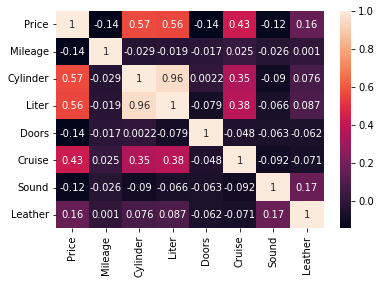

In [20]:
import seaborn as sns
corrMatrix = df_car.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Here we can see the correlation between Price and Mileage feature is -0.14.**

# Dummy variables in scikit-learn

In [3]:
df_car.drop(['Trim'],axis=1,inplace=True)

In [4]:
df_dummy = df_car.copy()

df_make = pd.get_dummies(df_car['Make'])
df_dummy[list(df_make.columns)] = df_make
df_dummy.pop('Make')


df_model = pd.get_dummies(df_car['Model'])
df_dummy[list(df_model.columns)] = df_model
df_dummy.pop('Model')

df_type = pd.get_dummies(df_car['Type'])
df_dummy[list(df_type.columns)] = df_type
df_dummy.pop('Type')

pd.set_option('display.max_columns', None)
df_dummy.head(10)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,Century,Classic,Cobalt,Corvette,Deville,G6,GTO,Grand Am,Grand Prix,Impala,Ion,L Series,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,15709.052821,22236,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,15230.003390,22576,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,15048.042184,22964,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,14862.093870,24021,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,15295.018267,27325,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [5]:
df_dummy.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB',
       'Saturn', '9-2X AWD', '9_3', '9_3 HO', '9_5', '9_5 HO', 'AVEO',
       'Bonneville', 'CST-V', 'CTS', 'Cavalier', 'Century', 'Classic',
       'Cobalt', 'Corvette', 'Deville', 'G6', 'GTO', 'Grand Am', 'Grand Prix',
       'Impala', 'Ion', 'L Series', 'Lacrosse', 'Lesabre', 'Malibu',
       'Monte Carlo', 'Park Avenue', 'STS-V6', 'STS-V8', 'Sunfire', 'Vibe',
       'XLR-V8', 'Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon'],
      dtype='object')

In [6]:
df_dummy.shape

(804, 51)

**2.Find the best combination of factors to predict price.**

In [7]:
columns = list(df_make.columns)
columns.extend(df_model.columns)
columns.extend(df_type.columns)
input_cols = []
for item in columns:
    input_cols.append([item])
input_cols

[['Buick'],
 ['Cadillac'],
 ['Chevrolet'],
 ['Pontiac'],
 ['SAAB'],
 ['Saturn'],
 ['9-2X AWD'],
 ['9_3'],
 ['9_3 HO'],
 ['9_5'],
 ['9_5 HO'],
 ['AVEO'],
 ['Bonneville'],
 ['CST-V'],
 ['CTS'],
 ['Cavalier'],
 ['Century'],
 ['Classic'],
 ['Cobalt'],
 ['Corvette'],
 ['Deville'],
 ['G6'],
 ['GTO'],
 ['Grand Am'],
 ['Grand Prix'],
 ['Impala'],
 ['Ion'],
 ['L Series'],
 ['Lacrosse'],
 ['Lesabre'],
 ['Malibu'],
 ['Monte Carlo'],
 ['Park Avenue'],
 ['STS-V6'],
 ['STS-V8'],
 ['Sunfire'],
 ['Vibe'],
 ['XLR-V8'],
 ['Convertible'],
 ['Coupe'],
 ['Hatchback'],
 ['Sedan'],
 ['Wagon']]

In [8]:
features = ['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combo_twos = list(it.combinations(features, 2))
combo_twos_list = [[x[0], x[1]] for x in combo_twos]
combo_twos_list

[['Mileage', 'Cylinder'],
 ['Mileage', 'Liter'],
 ['Mileage', 'Doors'],
 ['Mileage', 'Cruise'],
 ['Mileage', 'Sound'],
 ['Mileage', 'Leather'],
 ['Cylinder', 'Liter'],
 ['Cylinder', 'Doors'],
 ['Cylinder', 'Cruise'],
 ['Cylinder', 'Sound'],
 ['Cylinder', 'Leather'],
 ['Liter', 'Doors'],
 ['Liter', 'Cruise'],
 ['Liter', 'Sound'],
 ['Liter', 'Leather'],
 ['Doors', 'Cruise'],
 ['Doors', 'Sound'],
 ['Doors', 'Leather'],
 ['Cruise', 'Sound'],
 ['Cruise', 'Leather'],
 ['Sound', 'Leather']]

In [9]:
from copy import deepcopy
def all_combos_plus_scores(combos, combo_addition, df_dummy, focus='Price'):
    scores = {}
    for c_a in combo_addition:
        combos_c = deepcopy(combos)
        for cb in combos_c:
            cb.extend(c_a)
            scores[(cb[0], cb[1], cb[2])] = linear_reg_ret_r_square(cb, df_dummy, focus)
    return scores

In [12]:
car_data_combos = all_combos_plus_scores(combo_twos_list, input_cols, df_dummy)
car_data_combos_list = sorted(car_data_combos.items(), key=lambda c: c[1], reverse=True)
max_dict = {}
for score_ in car_data_combos_list:
    try:
        max_dict[score_[0][2]]
    except:
        max_dict[score_[0][2]] = score_[1]
        print(score_[1], score_[0])

0.6952326188089184 ('Mileage', 'Cylinder', 'SAAB')
0.5827463723115367 ('Liter', 'Cruise', 'Cadillac')
0.5818864330871814 ('Cylinder', 'Cruise', 'Convertible')
0.5565646069943804 ('Cylinder', 'Doors', 'Coupe')
0.5183767328460664 ('Liter', 'Cruise', 'XLR-V8')
0.467700799707776 ('Cylinder', 'Cruise', '9_3 HO')
0.46131412749530276 ('Cylinder', 'Doors', 'Chevrolet')
0.4403137783141914 ('Cylinder', 'Cruise', '9_5')
0.42327964442945476 ('Cylinder', 'Cruise', 'Pontiac')
0.4209127935020318 ('Cylinder', 'Cruise', 'Wagon')
0.41425766320268764 ('Cylinder', 'Cruise', '9_3')
0.409490813455742 ('Cylinder', 'Cruise', '9_5 HO')
0.40853637029735634 ('Cylinder', 'Cruise', 'Sedan')
0.40801434993536756 ('Cylinder', 'Cruise', 'Buick')
0.4066332114627611 ('Cylinder', 'Cruise', 'CST-V')
0.4061981380211487 ('Cylinder', 'Cruise', 'Grand Prix')
0.4039216683852761 ('Cylinder', 'Cruise', 'Malibu')
0.4028424051921041 ('Cylinder', 'Cruise', 'STS-V6')
0.40241000428897733 ('Cylinder', 'Cruise', 'Bonneville')
0.4000437

Above are the dominant two feature factors for each of the dummy variables; Cylinder and Cruise are the leading factors in the vast majority.


In [13]:
car_data_2 = {}
for item in deepcopy(input_cols):
    car_data_2[item[0]] = linear_reg_ret_r_square(item, df_dummy)

score_list2 = sorted(car_data_2.items(), key=lambda c: c[1], reverse=True)
for score in score_list2:
    print(score[1], score[0])

0.43467222055774146 Cadillac
0.2580823726662361 Convertible
0.22329254532193288 XLR-V8
0.16369972777296582 Chevrolet
0.11249608486981633 SAAB
0.09268208373129971 AVEO
0.08811897712425065 Deville
0.08294059063514281 Corvette
0.07236606185907579 CST-V
0.060443061923161845 STS-V8
0.059386315780149745 Cavalier
0.04481729286980152 Saturn
0.044294927303921816 9_3 HO
0.042509414286992286 Hatchback
0.04218076819132699 Ion
0.03711188670126875 Cobalt
0.0331684123827396 STS-V6
0.02992939459223687 9_5
0.028253210000207085 Coupe
0.020191011838045725 Pontiac
0.01551727999156971 9_3
0.01441266225511073 Malibu
0.012235997496740647 9_5 HO
0.011848005294655573 Vibe
0.010715368384112356 CTS
0.00990383596925093 Sunfire
0.008683138908399224 Grand Am
0.007825848896145682 GTO
0.007741907120061953 Classic
0.004735027107433676 Grand Prix
0.003698911729677512 Century
0.0029638255654020895 L Series
0.0020370652981834825 Wagon
0.001866756188844798 Park Avenue
0.001211196934485459 Sedan
0.0008950546441520713 Monte

We are taking the best three R2 score dummy variables Cadillac, Convertible,XLR-V8 into account and find the model R2 **score**

In [14]:
f = features + ['Cadillac', 'Convertible', 'XLR-V8']
linear_reg_ret_r_square(f, df_dummy)

0.8205076058696161

These three factors are enough to consider the model as a good model.

In [15]:
#If we take Cadillac, Convertible,Chevrolet as features then R2 will be
f = features + ['Cadillac', 'Convertible', 'Chevrolet']
linear_reg_ret_r_square(f, df_dummy)

0.8301641680699673

In [16]:
f = ['Cadillac', 'Convertible', 'Chevrolet', 'Mileage', 'Cylinder', 'Cruise', 'Liter']
linear_reg_ret_r_square(f,df_dummy)

0.8230830294947846

**So we can conclude that the three factors from Model,Make and Type needs to be considered along other numerical features to get the best model with a R2 score of 0.823 **

# Additional Try

# OneHot Encoder



In [ ]:
from sklearn.preprocessing import OneHotEncoder




In [ ]:
# Create a list of the categorical variables that you want to encode
categorical_vars = ['Make', 'Model', 'Type']
categories = [df_car[var].unique() for var in categorical_vars]



In [ ]:
print(categories)

[array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object), array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object), array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)]


In [ ]:
# Create the OneHotEncoder object
#onehot_encoder = OneHotEncoder(categorical_vars)
onehot_encoder = OneHotEncoder(categories=categories)



In [ ]:
# Use the fit_transform method to encode the categorical variables
onehot_encoded = onehot_encoder.fit_transform(df_car[categorical_vars])



In [ ]:
# The onehot_encoded variable is now a sparse matrix containing the encoded variables
# You can convert it to a dense NumPy array if needed using the toarray method:
onehot_encoded_array = onehot_encoded.toarray()

In [ ]:
onehot_encoded_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoded_columns = onehot_encoder.get_feature_names(categorical_vars)

In [ ]:
make_onehot_df = pd.DataFrame(onehot_encoded_array, columns=encoded_columns)

In [ ]:
make_onehot_df

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_Century,Model_Lacrosse,Model_Lesabre,Model_Park Avenue,...,Model_9_5,Model_9_5 HO,Model_9-2X AWD,Model_Ion,Model_L Series,Type_Sedan,Type_Convertible,Type_Hatchback,Type_Coupe,Type_Wagon
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
800,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
801,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_car_encoded= pd.concat([df_car,make_onehot_df], axis=1)

In [ ]:
df_car_encoded

,Price,Mileage,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,...,Model_9_5,Model_9_5 HO,Model_9-2X AWD,Model_Ion,Model_L Series,Type_Sedan,Type_Convertible,Type_Hatchback,Type_Coupe,Type_Wagon
0,17314.103129,8221,Buick,Century,Sedan,6,3.1,4,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17542.036083,9135,Buick,Century,Sedan,6,3.1,4,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,16218.847862,13196,Buick,Century,Sedan,6,3.1,4,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16336.913140,16342,Buick,Century,Sedan,6,3.1,4,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,16339.170324,19832,Buick,Century,Sedan,6,3.1,4,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,Sedan,6,3.0,4,1,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
800,16175.957604,19095,Saturn,L Series,Sedan,6,3.0,4,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
801,15731.132897,20484,Saturn,L Series,Sedan,6,3.0,4,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
802,15118.893228,25979,Saturn,L Series,Sedan,6,3.0,4,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
Numerical_values=['Mileage', 'Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Type      804 non-null    object 
 5   Cylinder  804 non-null    int64  
 6   Liter     804 non-null    float64
 7   Doors     804 non-null    int64  
 8   Cruise    804 non-null    int64  
 9   Sound     804 non-null    int64  
 10  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 69.2+ KB


In [ ]:
X=np.concatenate((onehot_encoded_array,df_car[Numerical_values].values),axis=1)

In [ ]:
print(X)

[[1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
Y=df_car['Price'].values

In [ ]:
model_encode=linear_model.LinearRegression()

In [ ]:
model_encode.fit(X,Y)

LinearRegression()

In [ ]:
linear_reg_eq_print(Numerical_values,df_car)

The equation for columns ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] with respect to Price:
[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] + 6758.755143598106


In [ ]:
def linear_reg_eq_print(Numerical_values,df_car):
  model_encode=linear_model.LinearRegression()
  X=np.concatenate((onehot_encoded_array,df_car[Numerical_values].values),axis=1)
  Y=df_car['Price'].values
  model_encode.fit(X,Y)
  print('The equation for columns {} with respect to Price:\n' '{} + {}'.format(Car_Predict_columns, model_encode.coef_, model_encode.intercept_))

In [ ]:
def linear_reg_return_R_Square(Numerical_values,df_car):
  model_encode=linear_model.LinearRegression()
  X=np.concatenate((onehot_encoded_array,df_car[Numerical_values].values),axis=1)
  Y=df_car['Price'].values
  model_encode.fit(X,Y)
  return model_encode.score(X,Y)

In [ ]:
linear_reg_return_R_Square(Numerical_values,df_car)

0.9804768702447504

# 1

In [ ]:
df_car_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              804 non-null    float64
 1   Mileage            804 non-null    int64  
 2   Make               804 non-null    object 
 3   Model              804 non-null    object 
 4   Type               804 non-null    object 
 5   Cylinder           804 non-null    int64  
 6   Liter              804 non-null    float64
 7   Doors              804 non-null    int64  
 8   Cruise             804 non-null    int64  
 9   Sound              804 non-null    int64  
 10  Leather            804 non-null    int64  
 11  Make_Buick         804 non-null    float64
 12  Make_Cadillac      804 non-null    float64
 13  Make_Chevrolet     804 non-null    float64
 14  Make_Pontiac       804 non-null    float64
 15  Make_SAAB          804 non-null    float64
 16  Make_Saturn        804 non

In [ ]:
df_car_encoded.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Type', 'Cylinder', 'Liter',
       'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn',
       'Model_Century', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Park Avenue',
       'Model_CST-V', 'Model_CTS', 'Model_Deville', 'Model_STS-V6',
       'Model_STS-V8', 'Model_XLR-V8', 'Model_AVEO', 'Model_Cavalier',
       'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Impala',
       'Model_Malibu', 'Model_Monte Carlo', 'Model_Bonneville', 'Model_G6',
       'Model_Grand Am', 'Model_Grand Prix', 'Model_GTO', 'Model_Sunfire',
       'Model_Vibe', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO',
       'Model_9-2X AWD', 'Model_Ion', 'Model_L Series', 'Type_Sedan',
       'Type_Convertible', 'Type_Hatchback', 'Type_Coupe', 'Type_Wagon'],
      dtype='object')

In [ ]:
categorical_vars_encoded = ['Cylinder', 'Liter',
       'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn',
       'Model_Century', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Park Avenue',
       'Model_CST-V', 'Model_CTS', 'Model_Deville', 'Model_STS-V6',
       'Model_STS-V8', 'Model_XLR-V8', 'Model_AVEO', 'Model_Cavalier',
       'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Impala',
       'Model_Malibu', 'Model_Monte Carlo', 'Model_Bonneville', 'Model_G6',
       'Model_Grand Am', 'Model_Grand Prix', 'Model_GTO', 'Model_Sunfire',
       'Model_Vibe', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO',
       'Model_9-2X AWD', 'Model_Ion', 'Model_L Series', 'Type_Sedan',
       'Type_Convertible', 'Type_Hatchback', 'Type_Coupe', 'Type_Wagon']

In [ ]:
all_vars = categorical_vars_encoded + Numerical_values

In [ ]:
def get_combos_after_encoded(Cols):
  return [it.combinations(Cols,n+1) for n in range(len(Cols))]
combos_after_encoded=get_combos_after_encoded(categorical_vars_encoded )



In [ ]:
def all_combo_score_after_encoded(categorical_vars_encoded,df_car_encoded,focus='Price'):
  combo_score_after_encoded={}
  for i in range(len(list(combos_after_encoded))):
    for j in list(combos_after_encoded[i]):
      combo_score_after_encoded[linear_reg_return_R_Square(list(j),df_car_encoded)] = j
  return combo_score_after_encoded


In [ ]:
combo_score_after_encoded=all_combo_score_after_encoded(categorical_vars_encoded,df_car_encoded)
sorted(combo_score_after_encoded.items(),key=lambda c : c[0], reverse= True)

In [ ]:
features=['Mileage', 'Cylinder', 'Liter',
       'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn',
       'Model_Century', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Park Avenue',
       'Model_CST-V', 'Model_CTS', 'Model_Deville', 'Model_STS-V6',
       'Model_STS-V8', 'Model_XLR-V8', 'Model_AVEO', 'Model_Cavalier',
       'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Impala',
       'Model_Malibu', 'Model_Monte Carlo', 'Model_Bonneville', 'Model_G6',
       'Model_Grand Am', 'Model_Grand Prix', 'Model_GTO', 'Model_Sunfire',
       'Model_Vibe', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO',
       'Model_9-2X AWD', 'Model_Ion', 'Model_L Series', 'Type_Sedan',
       'Type_Convertible', 'Type_Hatchback', 'Type_Coupe', 'Type_Wagon']

In [ ]:
X1=df_car_encoded[features]
Y1=df_car_encoded['Price']
model_com=linear_model.LinearRegression()
model_com.fit(X1,Y1)

LinearRegression()

# Cross value

In [ ]:
df_car.columns

In [ ]:
categorical_vars_encoded = ['Make', 'Model', 'Type']

In [ ]:
categorical_vars_encoded

In [ ]:
Numerical_values

In [ ]:
all_vars = categorical_vars_encoded + Numerical_values

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
def all_combo_score_after_encoded_h(combos_after_encoded_h,df_car):
    result={}
    for combo in combos_after_encoded_h:
        combo_array=df_car[combo].values
        model_combo=linear_model.LinearRegression()
        score=cross_val_score(model_combo,combo_array,df_car['Price'],cv=5).mean()
        combo_tuple = tuple(combo)
        result[combo_tuple]=score
    return result


In [ ]:
# Create a list of all possible combinations of the encoded categorical variables and the numerical variables
combos_after_encoded_h = [list(combo) for combo in it.combinations(all_vars, 2)]

In [ ]:
# Pass the combos_after_encoded variable to the all_combo_score_after_encoded function
combo_score_after_encoded_h = all_combo_score_after_encoded_h(combos_after_encoded_h, df_car)

In [ ]:
# Sort the combo_score_after_encoded dictionary by score in descending order
sorted(combo_score_after_encoded_h.items(), key=lambda c: c[0], reverse=True)